# Problem Statement
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data
#### What will be predicted score if a student study for 9.25 hrs in a day? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('student_scores - student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.shape

(25, 2)

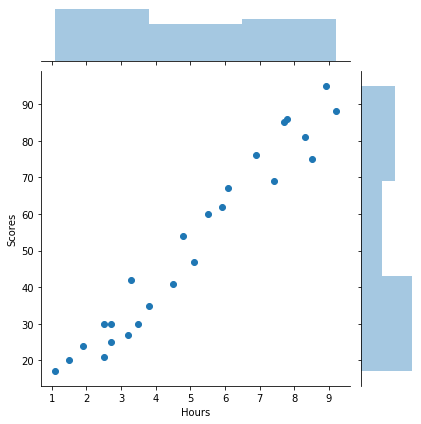

In [6]:
sns.jointplot(df['Hours'],df['Scores'])

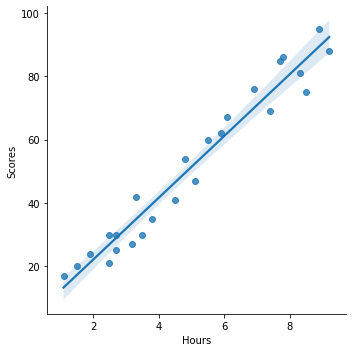

In [7]:
sns.lmplot(x='Hours',y='Scores',data=df)

# Inference
We can infer that the input and output variable are linearly related.
The variables show a positive correlation.

###  Let's Consider 33 being the passing marks, We will try find out what is the minimum and the maximum hour a candidate studies to get passing marks

In [8]:
min_hours_to_pass = pd.DataFrame(df[df['Scores']>33]['Hours'].sort_values())
min_hours_to_pass.index = range(len(min_hours_to_pass))
min_hours_to_pass.head()

,Hours
0,3.3
1,3.8
2,4.5
3,4.8
4,5.1


In [9]:
x=pd.DataFrame(df['Hours'])
y=pd.DataFrame(df['Scores'])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
LReg = LinearRegression()

In [12]:
LReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
train_predict = LReg.predict(x_train)
mae = mean_absolute_error(y_train,train_predict)
mse = mean_squared_error(y_train,train_predict)
print('Mean absolute error for training data is = ',mae)
print('Mean squared error for training data is = ',mse)
print('Root Mean square error for training data is = ',np.sqrt(mse))

Mean absolute error for training data is =  5.221357478352559
Mean squared error for training data is =  31.454835527366846
Root Mean square error for training data is =  5.608461065868858


In [14]:
test_predict=LReg.predict(x_test)
mae = mean_absolute_error(y_test,test_predict)
mse = mean_squared_error(y_test,test_predict)
print('Mean absolute error for testing data is = ',mae)
print('Mean squared error for testing data is = ',mse)
print('Root Mean square error for testing data is = ',np.sqrt(mse))

Mean absolute error for testing data is =  3.9207511902099244
Mean squared error for testing data is =  18.943211722315272
Root Mean square error for testing data is =  4.352380006653288


In [15]:
x_test = pd.DataFrame(x_test.reset_index(drop=True))
test_predict = pd.DataFrame(test_predict).reset_index(drop=True)

In [16]:
predicted_df = x_test.merge(test_predict,on=y_test.index)

In [17]:
predicted_df.drop('key_0',axis=1,inplace=True)

In [18]:
predicted_df.rename(columns={0:'Scores'},inplace=True)

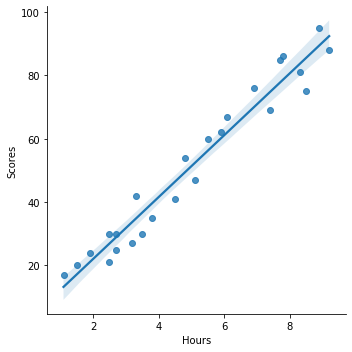

In [19]:
sns.lmplot('Hours','Scores',df)

## So how much should a student score if he studies 9.25 hours per day? 
#### Let's Find Out!

http://127.0.0.1:8050/

In [20]:
print('So if a student studies for 9.25 hours each day, he will have a score of around ',np.round(LReg.predict([[9.25]])[0,0],2),'%.')

So if a student studies for 9.25 hours each day, he will have a score of around  92.39 %.


In [21]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash_table.Format import Format, Group, Scheme, Symbol
import dash_bootstrap_components as dbc

image_bg = 'C://Users//sudar//OneDrive//Desktop//Work Files//TSF//assets//bg.jpg'
encoded_bg = base64.b64encode(open(image_bg, 'rb').read())

app = dash.Dash(external_stylesheets=[dbc.themes.SLATE])
app.layout = html.Div([
    html.H1('Score Calculator - Based on Hours Studied',className='text-field-title'),
    dbc.Input(id="hours-studied", placeholder="Enter Number of Hours You Studied", type="text",style = dict(width = '20%',display = 'list-item'),className='text-field'),
    dbc.Button("Calculate Score", id='calculate',color="success",size="lg",n_clicks=0,className = "home-button"),
    html.Div(id='total-score'),
    
    html.Div( children=[
    html.Img(className='bg',src='data:image/png;base64,{}'.format(encoded_bg.decode())) ])
    
])

@app.callback(Output('total-score', 'children'),
              [Input('calculate', 'n_clicks')],
              [State('hours-studied', 'value')])
def success(n_clicks,hours):
    if n_clicks > 0:
        hours=float(hours)
        return html.H3('After studying for '+str(hours)+' hours you can score '+str(np.round(LReg.predict([[hours]])[0,0],2))+'%',className='text-field-result')
    
    
    
if __name__ == '__main__':
    app.run_server(debug=False)



Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Aug/2020 18:33:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:33:26] "GET /assets/style.css?m=1595702299.7991753 HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:33:26] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:33:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:33:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:33:52] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:34:37] "POST /_dash-update-component HTTP/1.1" 200 -
